In [1]:
!pip install -q yfinance

In [2]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
stock_data = yf.download('AAPL', start='2010-01-01', end='2021-12-31')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [4]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.995605,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.901627,59773000


In [5]:
stock_data = stock_data.reset_index()
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [6]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)
stock_data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


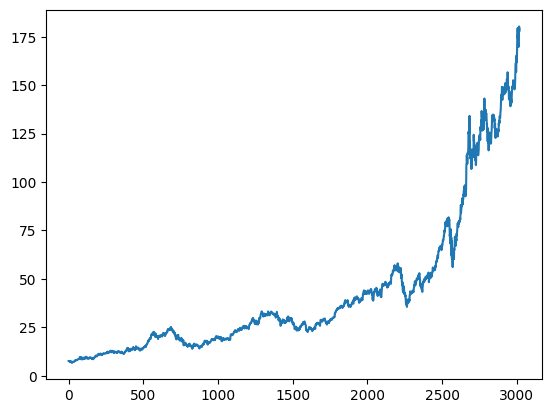

In [7]:
plt.plot(stock_data.Close)

In [8]:
stock_data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3015,175.850006,176.850006,175.270004,176.279999,68356600
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900


In [9]:
ma100 = stock_data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

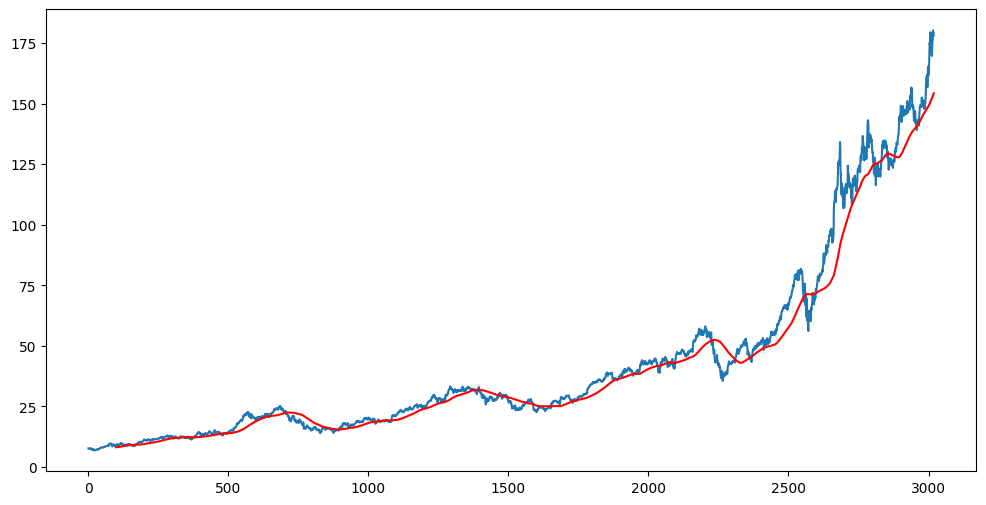

In [10]:
plt.figure(figsize= (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = stock_data.rolling(200).mean()
ma200 

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3015,142.309051,143.792650,141.09790,142.55920,86177557.5
3016,142.592501,144.088900,141.38745,142.85570,86111630.0
3017,142.886251,144.375550,141.67800,143.13220,86045332.5
3018,143.154401,144.642600,141.94510,143.40125,85780937.5


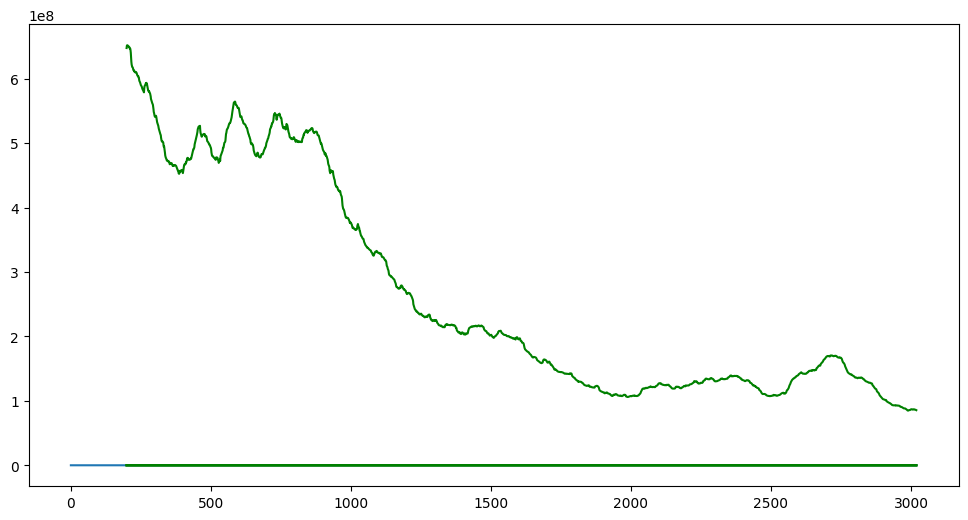

In [12]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma200, 'g')

In [13]:
stock_data.shape

(3020, 5)

In [14]:
#TRAINING AND TESTING OF THE DATA

data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70): int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [19]:
data_training_array.shape

(2114, 1)

In [20]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train) 

In [21]:
x_train.shape

(2014, 100, 1)

MACHINE LEARNING MODEL

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))



In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
63/63 [==============================] - 38s 407ms/step - loss: 0.0409
Epoch 2/50
63/63 [==============================] - 20s 319ms/step - loss: 0.0081
Epoch 3/50
63/63 [==============================] - 19s 298ms/step - loss: 0.0072
Epoch 4/50
63/63 [==============================] - 21s 337ms/step - loss: 0.0057
Epoch 5/50
63/63 [==============================] - 21s 334ms/step - loss: 0.0056
Epoch 6/50
63/63 [==============================] - 19s 299ms/step - loss: 0.0061
Epoch 7/50
63/63 [==============================] - 20s 321ms/step - loss: 0.0050
Epoch 8/50
63/63 [==============================] - 19s 300ms/step - loss: 0.0049
Epoch 9/50
63/63 [==============================] - 20s 322ms/step - loss: 0.0055
Epoch 10/50
63/63 [==============================] - 21s 338ms/step - loss: 0.0049
Epoch 11/50
63/63 [==============================] - 20s 321ms/step - loss: 0.0050
Epoch 12/50
63/63 [==============================] - 19s 301ms/step - loss: 0.0046
Epoch 13/50
6

In [ ]:
model.save('Stocktopia_model.h5')

In [ ]:
data_testing.head() 

In [ ]:
data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_stock_data = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_stock_data.head()

In [ ]:
input_data = scaler.fit_transform(final_stock_data)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#Making Predictions 

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show